In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# Load data
train_df = pd.read_csv(r'train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv(r'test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for missing_values in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    train_df[missing_values].fillna(train_df[missing_values].mode()[0], inplace=True)
    test_df[missing_values].fillna(test_df[missing_values].mode()[0], inplace=True)

C:\Users\fehin\AppData\Local\Temp\ipykernel_15928\1716368971.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[missing_values].fillna(train_df[missing_values].mode()[0], inplace=True)
C:\Users\fehin\AppData\Local\Temp\ipykernel_15928\1716368971.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [8]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)
test_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)

train_df['Loan_Amount_Term'].fillna(360, inplace=True)
test_df['Loan_Amount_Term'].fillna(360, inplace=True)

C:\Users\fehin\AppData\Local\Temp\ipykernel_15928\105611925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)
C:\Users\fehin\AppData\Local\Temp\ipykernel_15928\105611925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [9]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
test_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

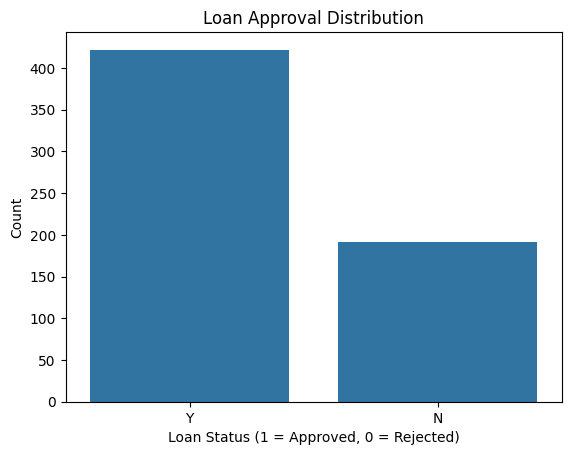

In [11]:
#To visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=train_df['Loan_Status'])
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status (1 = Approved, 0 = Rejected)")
plt.ylabel("Count")
plt.show()

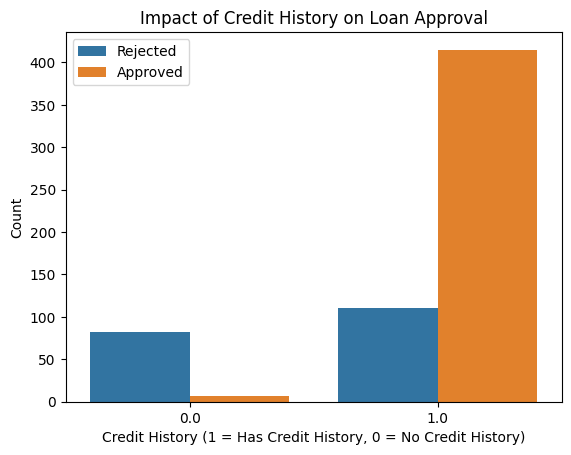

In [12]:
sns.countplot(x=train_df['Credit_History'], hue=train_df['Loan_Status'])
plt.title("Impact of Credit History on Loan Approval")
plt.xlabel("Credit History (1 = Has Credit History, 0 = No Credit History)")
plt.ylabel("Count")
plt.legend(["Rejected", "Approved"])
plt.show()

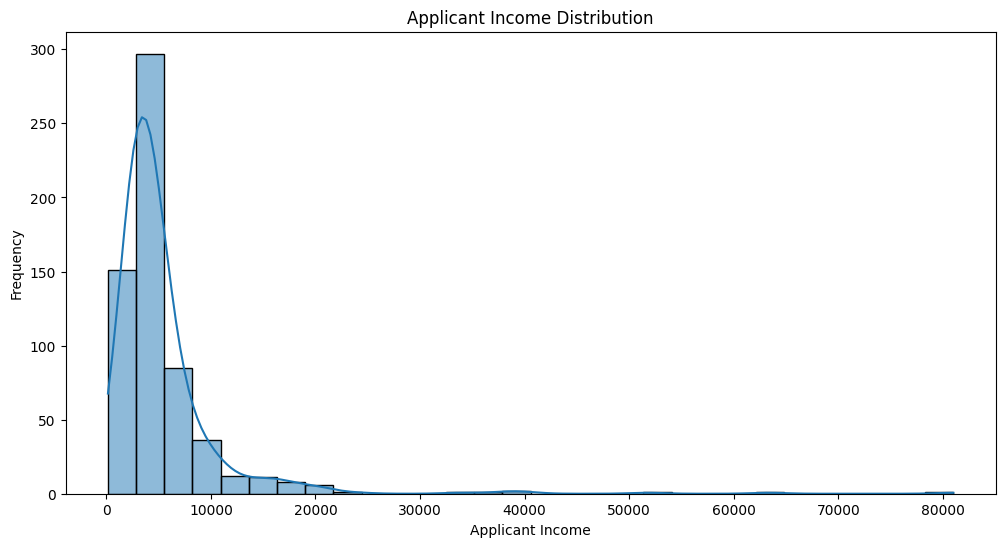

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['ApplicantIncome'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

In [51]:
# Drop Loan_ID before training
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status']

In [15]:
# Drop Loan_ID from test set
test_df = test_df.drop(columns=['Loan_ID'])

In [16]:
X.shape

(614, 11)

In [17]:
y.shape

(614,)

In [18]:
X.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [19]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [21]:
test_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [22]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [50]:
# Splitting data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Preprocessing pipeline
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [26]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Ignore unseen categories
])

In [27]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [28]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [52]:
# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_model)
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_val)

# Evaluation
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

# Display best hyperparameters
print("Best Parameters:", grid_search.best_params_)

Validation Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Confusion Matrix:
[[18 25]
 [ 1 79]]
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [54]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [55]:
test_predictions = pipeline.predict(test_df)

In [56]:
test_df['Loan_Status'] = test_predictions

In [58]:
test_df[['Loan_Status']].to_csv('loan_predictions.csv', encoding='utf-8', index=False)

In [59]:
import joblib

joblib.dump(pipeline, 'loan_eligibility_pipeline.pkl')
print("Pipeline saved successfully!")

Pipeline saved successfully!
